In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import xgboost as xgb
import tensorflow as tf
from sklearn.metrics import mean_squared_error, accuracy_score, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from scipy.stats import boxcox
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
import time
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format


Bad key "text.kerning_factor" on line 4 in
C:\Users\enes_\anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def toc(tic):
    elapsed= time.time()-tic
    return elapsed

# Introduction

In this project how different models perform on certain datasets and how exploratory data analysis affects the given models will be demonstrated. Famous house prices dataset from kaggle (https://www.kaggle.com/c/house-prices-advanced-regression-techniques) will be used for linear regression models, the "hello world" dataset of machine learning: titanic dataset will be used for binary classification(https://www.kaggle.com/c/titanic/data), and Fashion MNIST (https://www.kaggle.com/zalando-research/fashionmnist) dataset will be used for multiclass classification.

# Datasets

 Both time spent and accuracy of algorithms will be inspected for all datasets. (Only some models can work with raw(unfilled) dataset.)

Raw:
    
    Datasets will be imported from original sources

Filled:

    Raw datasets will be checked for missing(NaN) values, and missing values will be filled by various methods.(mean, median, enterpolation)
    

Transformation:

    Filled raw features will be transformed with Box-cox transformation.(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html)

## Raw (get_dummies) 

In [3]:
dataset_path = r'C:\Users\enes_\Documents\GitHub\All-Models-Examination\Datasets\\'

titanic      = pd.read_csv(dataset_path+"titanic.csv")
house_prices = pd.read_csv(dataset_path+"house_prices.csv")
fashion_mnist= pd.read_csv(dataset_path+"fashion_mnist.csv")

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [5]:
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
fashion_mnist.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
del titanic["Name"]
del titanic["Ticket"]
del titanic["Cabin"]
del house_prices["Id"]

We surely do not need passengers' names and ticket IDs to predict if they are survived or not.

In [8]:
def get_dummy(df):
    object_features = list()
    for feature in df:
        if df[feature].dtype==object:
            dummies = pd.get_dummies(df[feature])
            df = pd.merge(df,dummies,right_index=True,left_index=True)
            del df[feature]
    return df
            

This function replaces all categorical features with dummies, and returns the replaced array as numpy array.

In [9]:
titanic_raw       = get_dummy(titanic)
fashion_mnist_raw = get_dummy(fashion_mnist)
house_prices_raw  = get_dummy(house_prices)

Raw datasets are ready.

## Filled

In [10]:
def fill_median(df_to_fill):
    need_to_fill = df_to_fill.columns[df_to_fill.isnull().sum() *100 /df_to_fill.shape[0] !=0]
    for feature in need_to_fill:
        for i in df_to_fill[df_to_fill[feature].isnull()].index:
            all_nonull_values_for_feature =df_to_fill[feature][df_to_fill[feature].isnull()==False]
            df_to_fill.loc[i,feature] = df_to_fill[feature].value_counts().index[0]
    return df_to_fill

This function fills all null values with median of the missing feature. And returns all filled dataframe.

In [11]:
ttf = fill_median(titanic)
hpf = fill_median(house_prices)
titanic_filled       = get_dummy(ttf)
house_prices_filled  = get_dummy(hpf)
fashion_mnist_filled = fashion_mnist


ttf and hpf created to use in next section, also no need to fill fashion MNIST as it is all filled pixel values, but fashion_mnist_filled array created to make it less confusing.

## Transformation (on Filled)

In [12]:
def cuberoot_array(df):
    for feature in df:
        if df[feature].dtype != object:
            df[feature] = df[feature]**(1/3)
    return df

In [13]:
house_prices_transformed  = get_dummy(cuberoot_array(hpf))
titanic_transformed       = get_dummy(cuberoot_array(ttf))
fashion_mnist_transformed = fashion_mnist_filled

We do not need to transform fashion_mnist, but fashion_mnist_transformed array created to make it less confusing.

## General Properties of Datasets

In [14]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,7.22,0.38,1.30,2.97,0.36,0.27,2.77
std,1.86,0.49,0.18,0.55,0.54,0.49,1.07
min,1.00,0.00,1.00,0.75,0.00,0.00,0.00
25%,6.07,0.00,1.26,2.80,0.00,0.00,1.99
50%,7.64,0.00,1.44,2.88,0.00,0.00,2.44
75%,8.74,1.00,1.44,3.27,1.00,0.00,3.14
max,9.62,1.00,1.44,4.31,2.00,1.82,8.00


In [15]:
house_prices.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00",...,"1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,3.64,4.04,21.16,1.82,1.77,12.54,12.57,2.40,5.61,0.80,...,2.69,2.28,0.74,0.09,0.45,0.04,0.33,1.80,12.62,55.53
std,0.87,0.42,3.82,0.14,0.12,0.06,0.04,3.08,4.18,2.30,...,2.90,2.20,1.85,0.74,1.54,0.57,1.84,0.29,0.00,7.52
min,2.71,2.76,10.91,1.00,1.00,12.32,12.49,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,12.61,32.68
25%,2.71,3.91,19.62,1.71,1.71,12.50,12.53,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.71,12.61,50.65
50%,3.68,3.98,21.16,1.82,1.71,12.54,12.59,0.00,7.27,0.00,...,0.00,2.92,0.00,0.00,0.00,0.00,0.00,1.82,12.62,54.63
75%,4.12,4.29,22.64,1.91,1.82,12.60,12.61,5.48,8.93,0.00,...,5.52,4.08,0.00,0.00,0.00,0.00,0.00,2.00,12.62,59.81
max,5.75,6.79,59.93,2.15,2.08,12.62,12.62,11.70,17.80,11.38,...,9.50,8.18,8.20,7.98,7.83,9.04,24.93,2.29,12.62,91.06


Fashion mnist contains only pixel values of 28*28 images. I would be meaningless if I call .describe on it.

In [16]:
prop = pd.DataFrame(index=["titanic","house_prices","fashion_mnist"])
prop["Feature count"] = [titanic.shape[1]-1,house_prices.shape[1]-1,fashion_mnist.shape[1]-1]
prop

,Feature count
titanic,8
house_prices,79
fashion_mnist,784


I added "-1" because one of the features will be target feature.

# Models

All models will be defined in this section. As same models will be used in multiple times, definitions may help save time for us. Check definitions if you have detailed informations about how algorithms used(and with what hyperparameters). Necessary libraries are indicated at the top of the definations.

## Linear Regression

In [17]:
# from sklearn import linear_model
# from sklearn.model_selection import RandomizedSearchCV

def sklearn_linreg(xtr, xte, ytr, yte, reg="none"):
    if reg =="none":
        lrm = linear_model.LinearRegression()
        lrm.fit(xtr,ytr)
        rmse = mean_squared_error(yte**3,lrm.predict(xte)**3)**(1/2)
        print("Mean squared error on test set:",rmse)
        return rmse
    
    elif reg =="Ridge":
        parameters = {'alpha':[10**x for x in range(-10,10)]
                     }
        lrm = linear_model.Ridge(random_state=0,max_iter=1000)
        rand_cv = RandomizedSearchCV(lrm, 
                                     param_distributions=parameters,
                                     n_iter=30,
                                     random_state=0)
        rand_cv.fit(xtr,ytr)
        rmse = mean_squared_error(yte**3,rand_cv.best_estimator_.predict(xte)**3)**(1/2)
        print("Mean squared error on test set:",rmse)
        return rmse
    
    elif reg =="Lasso":
        parameters = {'alpha':[10**x for x in range(-10,10)],
                     "selection":["cyclic", "random"]
                    }
        
        lrm = linear_model.Lasso(random_state=0,
                                 max_iter=1000)
        
        rand_cv = RandomizedSearchCV(lrm,
                                     param_distributions=parameters,
                                     n_iter=30,
                                     random_state=0)
        
        rand_cv.fit(xtr,ytr)
        rmse = mean_squared_error(yte**3,rand_cv.best_estimator_.predict(xte)**3)**(1/2)
        print("Mean squared error on test set:",rmse)
        return rmse

    elif reg =="ElasticNet":
        parameters = {'alpha':[10**x for x in range(-10,10)],
                     "selection":["cyclic", "random"],
                      "l1_ratio":[i/10 for i in range(0,10)]
                    }
        
        lrm = linear_model.ElasticNet(random_state=0,max_iter=1000)
        
        rand_cv = RandomizedSearchCV(lrm,
                                     param_distributions=parameters,
                                     n_iter=30,
                                     random_state=0)
        
        rand_cv.fit(xtr,ytr)
        rmse = mean_squared_error(yte**3,rand_cv.best_estimator_.predict(xte)**3)**(1/2)
        print("Mean squared error on test set:",rmse)
        return rmse

In [18]:
# import xgboost as xgb
def xgb_linreg(xtr, xte, ytr, yte,eta=0.3,max_depth =100):
    xtr.columns= [x for x in range(0,xtr.shape[1])]
    xte.columns= [x for x in range(0,xte.shape[1])]
    xgb_model     = xgb.XGBRegressor(
                            as_pandas=True,
                            seed=0,
                            eta=eta,
        max_depth =max_depth 
                           )
    xgb_model.fit(xtr,ytr)
    yhat = xgb_model.predict(xte)
    rmse = np.sqrt(mean_squared_error(yte**3, yhat**3))
    return rmse

In [19]:
# import lgboost as lgb
def lgb_linreg(xtr, xte, ytr, yte):
    xtr.columns= [x for x in range(0,xtr.shape[1])]
    xte.columns= [x for x in range(0,xte.shape[1])]

    lgb_model     = lgb.LGBMRegressor(
                            as_pandas=True,
                            seed=0
                           )
    lgb_model.fit(xtr,ytr)
    yhat = lgb_model.predict(xte)
    rmse = np.sqrt(mean_squared_error(yte**3, yhat**3))
    return rmse

In [20]:
def decision_tree_reg(xtr,xte,ytr,yte,max_depth=5):
    tree_model = DecisionTreeRegressor(
        max_depth=max_depth,
        random_state=0
    )
    tree_model.fit(xtr,ytr)
    yhat=tree_model.predict(xte)
    mse=mean_squared_error(yhat**3,yte**3)
    rmse = mse**(1/2)
    return rmse

In [21]:
def random_forest_reg(xtr,xte,ytr,yte,n_estimators=100):
    tree_model = RandomForestRegressor(
        n_estimators=n_estimators,
        random_state=0
    )
    tree_model.fit(xtr,ytr)
    yhat=tree_model.predict(xte)
    mse=mean_squared_error(yhat**3,yte**3)
    rmse = mse**(1/2)
    return rmse

## Classification

In [22]:
def sklearn_logreg(xtr, xte, ytr, yte, penalty="l2",C=10,solver="lbfgs"):
    lrm = linear_model.LogisticRegression(solver=solver,penalty = penalty,C=C,)
    lrm.fit(xtr,ytr)
    acc = lrm.score(xte,yte)
    print("Accuracy on test set:",acc)
    return acc


In [23]:
def KNN(xtr, xte, ytr, yte, k=3):
    knn_model= KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(xtr, ytr)
    print("Accuracy on test set with KNN algorithm:",knn_model.score(xte,yte))
    return knn_model.score(xte,yte)

In [24]:
def decision_tree_classify(xtr,xte,ytr,yte,criterion="entropy",max_features=5,max_depth=5):
    tree_model = DecisionTreeClassifier(
        criterion=criterion,
        max_features=max_features,
        max_depth=max_depth,
        random_state = 0
    )
    tree_model.fit(xtr,ytr)
    acc=tree_model.score(xte,yte)
    return acc

In [25]:
def random_forest_classify(xtr,xte,ytr,yte,criterion="entropy",max_features=5,max_depth=5):
    forest_model = RandomForestClassifier(
        criterion=criterion,
        max_features=max_features,
        max_depth=max_depth,
        random_state = 0
    )
    forest_model.fit(xtr,ytr)
    acc=forest_model.score(xte,yte)
    return acc

In [26]:
def svm(xtr,xte,ytr,yte,C=4):

    svc = SVC(kernel='linear', C=C)
    svc.fit(xtr,ytr)
    yhat=svc.predict(xte)
    acc= accuracy_score(yte,yhat)
    return acc

In [27]:
def xgb_classification(xtr,xte,ytr,yte,obj,num_class,max_depth=3):
    xtr.columns= [x for x in range(0,xtr.shape[1])]
    xte.columns= [x for x in range(0,xte.shape[1])]
    params = {"objective":obj,
              "max_depth":max_depth,
              "silent":1,
              "num_class":num_class}
    dmatr = xgb.DMatrix(data=xtr, label=ytr)
    model_cv = xgb.cv(dtrain=dmatr,
                      params=params,
                      nfold=3, 
                      num_boost_round=10,
                      as_pandas=True,
                      seed=0)
    print('Accuracy on test set by XGB : {:.3f}'.format((1-model_cv.iloc[:,2]).max()))
    return (1-model_cv.iloc[:,2]).max()

In [28]:
def lgb_classification(xtr,xte,ytr,yte,obj,num_class,metric,binary=False):
    params = {
          'objective' : obj,
          "metric":metric,
          "num_class":num_class}
    dtr = lgb.Dataset(xtr, label=ytr)
    lgb_model = lgb.train(params,dtr,num_boost_round=50)
    yhat= lgb_model.predict(xte)
    
    if binary==False:
        for i in range(yhat.shape[0]):
            maxind = np.argmax(yhat[i,:])
            yhat[i,:] = 0
            yhat[i,maxind] = 1
        yte=pd.get_dummies(yte)
    elif binary==True:
            yhat = [1 if x>0.5 else 0 for x in yhat]
            
    
    return accuracy_score(yhat,yte)

## Neural Networks


In [29]:
def neural_net(xtr,xte,ytr,yte,epochnum=100,optimizer="adam",denses=[64,128,256,1],dropout=0.2,binary=True):
    model = tf.keras.Sequential()
    m = xtr.shape[1]
    model.add(tf.keras.layers.Dense(denses[0], activation='relu', input_shape=(m,)))
    flag=0
    for dense in denses[1:-1]:
        model.add(tf.keras.layers.Dense(dense, activation='relu'))
        if dense==np.max(denses) and flag==0:
            model.add(tf.keras.layers.Dropout(dropout))
            flag+=1
    if binary==True:
        model.add(tf.keras.layers.Dense(denses[-1],activation="sigmoid"))
        model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])
    elif binary==False:
        model.add(tf.keras.layers.Dense(denses[-1],activation="softmax"))
        model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
        
    test_accs=[]
  
    history= model.fit(xtr,ytr,validation_split=0.3,epochs=epochnum,verbose=0)
    test_loss, test_acc = model.evaluate(xte, yte, verbose=0)
    print("Sizes of layers:",denses)
    return history,test_acc

# Models on Datasets

Error-Accuracy values and execution times will be stored in a dataframe(named "infotable")

In [30]:
infotable_linreg= pd.DataFrame(columns=["Rmse","Execution Time"],index=["Sklearn","Ridge","Lasso","ElasticNet","LGB","XGB","Random Forest","Decision Tree"])
infotable_logreg_bin= pd.DataFrame(columns=["Accuracy","Execution Time"],index=["Sklearn","LGB","XGB","SVM","Random Forest","Decision Tree","Neural Net"])
infotable_logreg_multi= pd.DataFrame(columns=["Accuracy","Execution Time"],index=["Sklearn","Decision Tree","Random Forest","LGB","XGB","Neural Net"])

## Linear Regression (on House Prices dataset)

### Dataset initialize

In [31]:
xtr, xte, ytr, yte = train_test_split(house_prices_transformed.drop(columns="SalePrice"),house_prices_transformed["SalePrice"],test_size=0.2, random_state=0)

### Sklearn

RandomSearch used for Sklearn linear regression models, no need to have extra tuning.

In [32]:
tic=time.time()
infotable_linreg.iloc[0,0]=sklearn_linreg(xtr, xte, ytr, yte)
infotable_linreg.iloc[0,1]=toc(tic)

Mean squared error on test set: 60414.536899288025


In [33]:
tic=time.time()
infotable_linreg.iloc[1,0]=sklearn_linreg(xtr, xte, ytr, yte,reg ="Ridge")
infotable_linreg.iloc[1,1]=toc(tic)

Mean squared error on test set: 46074.889544787206


In [34]:
tic=time.time()
infotable_linreg.iloc[2,0]=sklearn_linreg(xtr, xte, ytr, yte,reg ="Lasso")
infotable_linreg.iloc[2,1]=toc(tic)

Mean squared error on test set: 44428.76275975098


In [35]:
tic=time.time()
infotable_linreg.iloc[3,0]=sklearn_linreg(xtr, xte, ytr, yte,reg ="ElasticNet")
infotable_linreg.iloc[3,1]=toc(tic)

Mean squared error on test set: 42782.24527837342


### LGBoost

In [36]:
tic=time.time()
infotable_linreg.iloc[4,0]=lgb_linreg(xtr, xte, ytr, yte)
infotable_linreg.iloc[4,1]=toc(tic)

### XGBoost

In [37]:
tic=time.time()
infotable_linreg.iloc[5,0]=xgb_linreg(xtr, xte, ytr, yte,eta=0.2,max_depth =100)
infotable_linreg.iloc[5,1]=toc(tic)

### Random Forest

In [38]:
tic=time.time()
infotable_linreg.iloc[6,0]=random_forest_reg(xtr,xte,ytr,yte)
infotable_linreg.iloc[6,1]=toc(tic)

### Decision Tree

In [39]:
tic=time.time()
infotable_linreg.iloc[7,0]=decision_tree_reg(xtr,xte,ytr,yte,max_depth=10)
infotable_linreg.iloc[7,1]=toc(tic)

In [40]:
infotable_linreg

,Rmse,Execution Time
Sklearn,"60,414.54",0.02
Ridge,"46,074.89",0.84
Lasso,"44,428.76",9.07
ElasticNet,"42,782.25",12.39
LGB,"30,143.54",0.20
XGB,"30,621.98",1.50
Random Forest,"32,999.11",1.89
Decision Tree,"39,306.78",0.03


## Binary Classification (on Titanic dataset)

### Dataset Initialize

In [41]:
xtr, xte, ytr, yte = train_test_split(titanic_transformed.drop(columns="Survived"),titanic_transformed["Survived"],test_size=0.2, random_state=0)

### Sklearn

In [42]:
tic=time.time()
infotable_logreg_bin.iloc[0,0]= sklearn_logreg(xtr, xte, ytr, yte,  penalty ='l2',C=100)
infotable_logreg_bin.iloc[0,1]= toc(tic)

Accuracy on test set: 0.8212290502793296


### LGBoost

In [43]:
tic=time.time()
infotable_logreg_bin.iloc[1,0]= lgb_classification(xtr,xte,ytr,yte,obj="binary",num_class=1,metric="binary_error",binary=True)
infotable_logreg_bin.iloc[1,1]= toc(tic)

### XGBoost

In [44]:
tic=time.time()
infotable_logreg_bin.iloc[2,0]=xgb_classification(xtr,xte,ytr,yte,obj="binary:logistic",num_class=1)
infotable_logreg_bin.iloc[2,1]= toc(tic)

Accuracy on test set by XGB : 0.823


### Support Vector Machine

In [45]:
tic=time.time()
infotable_logreg_bin.iloc[3,0]=svm(xtr,xte,ytr,yte,C=20)
infotable_logreg_bin.iloc[3,1]= toc(tic)

### Random Forest

In [46]:
tic=time.time()
infotable_logreg_bin.iloc[4,0]= random_forest_classify(xtr,xte,ytr,yte,max_depth=100,max_features=4)
infotable_logreg_bin.iloc[4,1]= toc(tic)

### Decision Tree

In [47]:
tic=time.time()
infotable_logreg_bin.iloc[5,0]= decision_tree_classify(xtr,xte,ytr,yte,max_depth=5,max_features=5)
infotable_logreg_bin.iloc[5,1]= toc(tic)

In [48]:
infotable_logreg_bin

,Accuracy,Execution Time
Sklearn,0.82,0.02
LGB,0.86,0.06
XGB,0.82,0.02
SVM,0.79,2.42
Random Forest,0.87,0.15
Decision Tree,0.84,0.00
Neural Net,NaN,NaN


### Neural Net

Sizes of layers: [32, 64, 1]


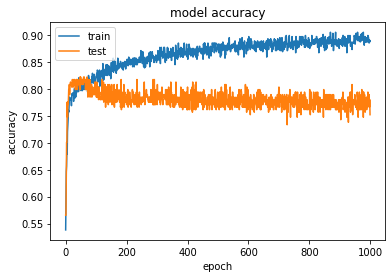

0.8044693

In [49]:
history,testacc = neural_net(xtr,xte,ytr,yte,binary=True,denses=[32,64,1],dropout=0.5,epochnum=1000)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
testacc

Sizes of layers: [32, 64, 1]


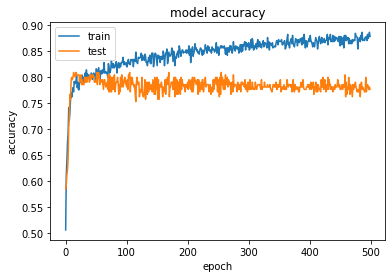

0.8324022

In [50]:
history,testacc = neural_net(xtr,xte,ytr,yte,binary=True,denses=[32,64,1],dropout=0.5,epochnum=500)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
testacc

Sizes of layers: [32, 64, 1]


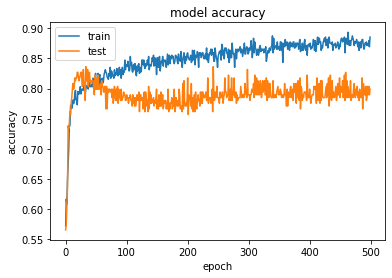

0.82681566

In [51]:
history,testacc = neural_net(xtr,xte,ytr,yte,binary=True,denses=[32,64,1],dropout=0.3,epochnum=500)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
testacc

Sizes of layers: [32, 64, 1]


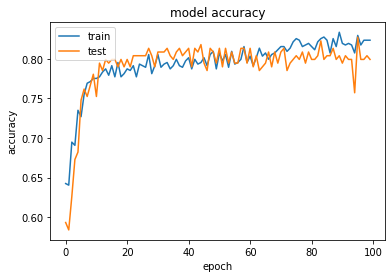

0.79888266

In [52]:
history,testacc = neural_net(xtr,xte,ytr,yte,binary=True,denses=[32,64,1],dropout=0,epochnum=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
testacc

Sizes of layers: [32, 64, 1]


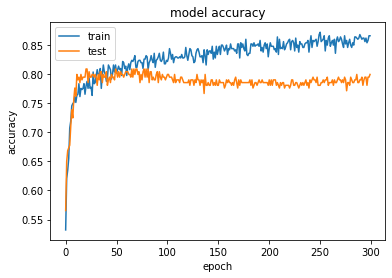

0.82681566

In [53]:
history,testacc = neural_net(xtr,xte,ytr,yte,binary=True,denses=[32,64,1],dropout=0.6,epochnum=300)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
testacc

Sizes of layers: [8, 4, 1]


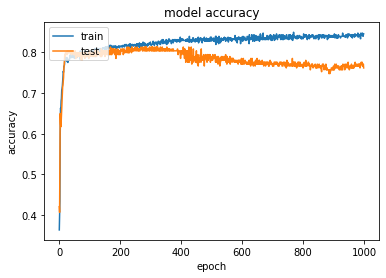

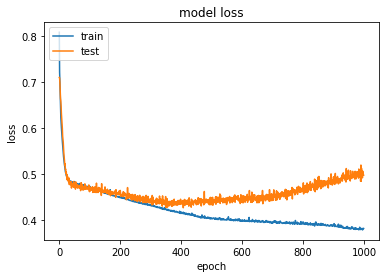

0.82681566

In [54]:
history,testacc = neural_net(xtr,xte,ytr,yte,binary=True,denses=[8,4,1],dropout=0.5,epochnum=1000)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
testacc

## Multi-Class Classification (on Fashion MNIST)

### Dataset Initialize

In [55]:
xtr, xte, ytr, yte = train_test_split(fashion_mnist_transformed.iloc[:,1:],fashion_mnist_transformed.iloc[:,0],test_size=0.2, random_state=0)

### Sklearn

In [56]:
tic=time.time()
infotable_logreg_multi.iloc[0,0]= sklearn_logreg(xtr, xte, ytr, yte, penalty ='l2', C=10)
infotable_logreg_multi.iloc[0,1]= toc(tic)

Accuracy on test set: 0.8479166666666667


### Decision Tree

In [57]:
tic=time.time()
infotable_logreg_multi.iloc[1,0]= decision_tree_classify(xtr,xte,ytr,yte,max_depth=10,max_features=10)
infotable_logreg_multi.iloc[1,1]= toc(tic)

### Random Forest

In [58]:
tic=time.time()
infotable_logreg_multi.iloc[2,0]= random_forest_classify(xtr,xte,ytr,yte,max_depth=100,max_features=10)
infotable_logreg_multi.iloc[2,1]= toc(tic)

### XGBoost

In [59]:
tic=time.time()
infotable_logreg_multi.iloc[3,0]= xgb_classification(xtr,xte,ytr,yte,obj="multi:softmax",num_class=10,max_depth=3)
infotable_logreg_multi.iloc[3,1]= toc(tic)

Accuracy on test set by XGB : 0.822


### LGBoost

In [60]:
tic=time.time()
infotable_logreg_multi.iloc[4,0]= lgb_classification(xtr,xte,ytr,yte,obj="multiclass",metric="multi_error",num_class=10)
infotable_logreg_multi.iloc[4,1]= toc(tic)

In [61]:
infotable_logreg_multi

,Accuracy,Execution Time
Sklearn,0.85,7.58
Decision Tree,0.76,0.38
Random Forest,0.88,23.70
LGB,0.82,52.56
XGB,0.88,40.92
Neural Net,NaN,NaN


### Neural Net

In [62]:
yte=pd.get_dummies(yte)
ytr=pd.get_dummies(ytr)

In [63]:
history,testacc = neural_net(xtr,xte,ytr,yte,binary=False,denses=[32,64,10],dropout=0,epochnum=200)

Sizes of layers: [32, 64, 10]


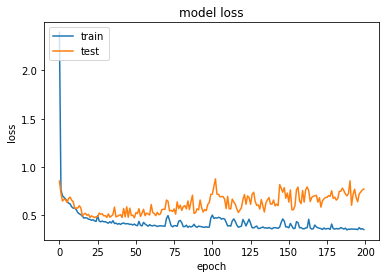

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

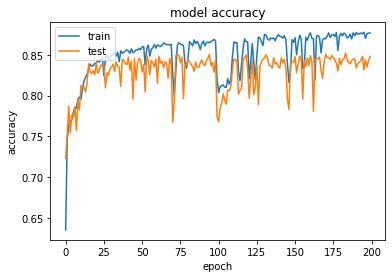

0.84641665

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
testacc

In [66]:
history,testacc = neural_net(xtr,xte,ytr,yte,binary=False,denses=[128,64,10],dropout=0.1,epochnum=200)

Sizes of layers: [128, 64, 10]


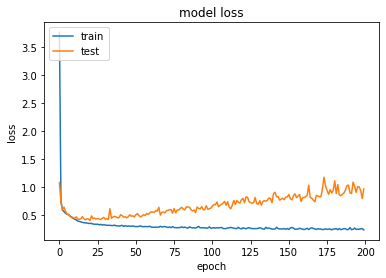

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

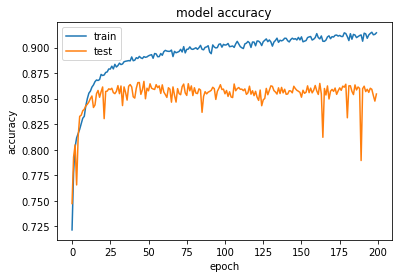

0.85158336

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
testacc

In [69]:
history,testacc = neural_net(xtr,xte,ytr,yte,binary=False,denses=[128,64,10],dropout=0.1,epochnum=500)

Sizes of layers: [128, 64, 10]


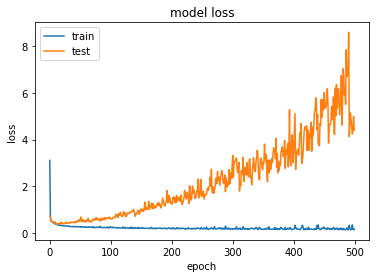

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

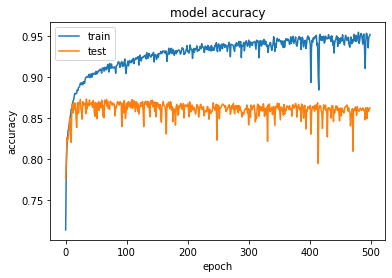

0.8639167

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
testacc

# Comparison of Models

## Linear Regression

## Binary Classification

## Multi-Class Classification